# INTEGRATE on ESBJERG data

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # #%load_ext autoreload
    # # # # #%autoreload 2
    pass

In [2]:
import integrate as ig
import numpy as np
import matplotlib.pyplot as plt
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

Notebook detected. Parallel processing is OK


In [3]:
case = 'ESBJERG'
files = ig.get_case_data(case=case)
f_data_h5 = files[0]
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)

X, Y, LINE, ELEVATION = ig.get_geometry(f_data_h5)

Getting data for case: ESBJERG
--> Got data for case: ESBJERG
Using data file: ESBJERG_ALL.h5
Using GEX file: TX07_20230906_2x4_RC20-33.gex


## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d})$

In this example a simple layered prior model will be considered

### 1a. first, a sample of the prior model parameters, $\rho(\mathbf{m})$, will be generated

In [4]:
N=5000000
# Layered model
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=3, RHO_min=1, RHO_max=500)

# Plot some summary statistics of the prior model
#ig.plot_prior_stats(f_prior_h5)

### 1b. Then, a corresponding sample of $\rho(\mathbf{d})$, will be generated

In [5]:
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, parallel=parallel, showInfo=0, Ncpu=64)

True
prior_data_gaaem: Using 64 parallel threads.
len(C_chunks) 64
len(tx_height_chunks) 64
[]


Time elapsed: 5284.0 s, for 5000000 soundings. 1.057 ms/sounding. 946.3it/s


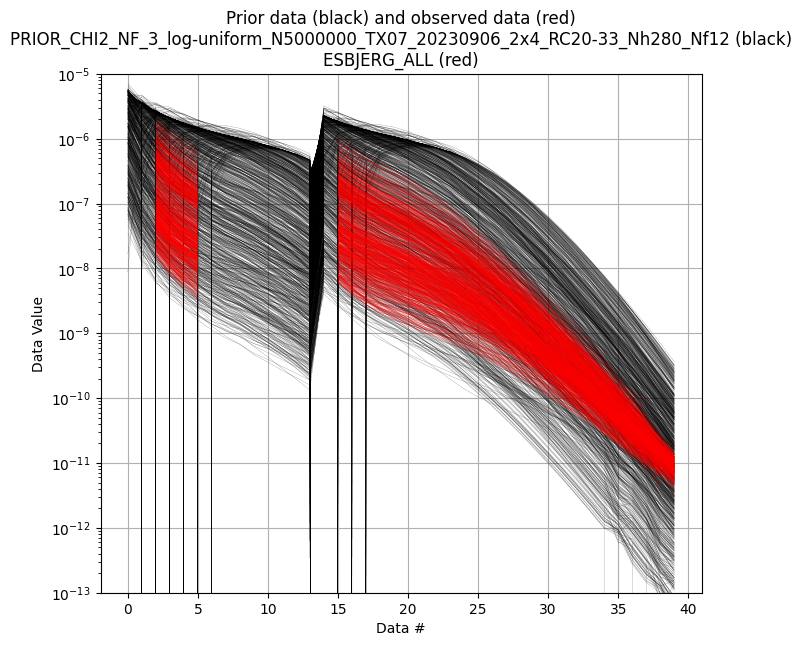

In [6]:
ig.plot_data_prior(f_prior_data_h5,f_data_h5,nr=1000,alpha=1, ylim=[1e-13,1e-5])

## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [7]:
N_use = N
f_post_h5 = ig.integrate_rejection(f_prior_data_h5, 
                                   f_data_h5, 
                                   N_use = N_use, 
                                   showInfo=1, 
                                   Ncpu = 10,
                                   parallel=parallel)

<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_CHI2_NF_3_log-uniform_N5000000_TX07_20230906_2x4_RC20-33_Nh280_Nf12.h5
f_data_h5=ESBJERG_ALL.h5
f_post_h5=POST_ESBJERG_ALL_PRIOR_CHI2_NF_3_log-uniform_N5000000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu5000000_aT1.h5


All done
T_av=11.1, Time=11783.1s/28061 soundings ,419.9ms/sounding, 2.4it/s
D1: NOT RECOGNIZED
M1: CONTINUOUS
nm=90, nsounding=28061, nr=400
M_mean.shape=(28061, 90)
Creating /M1/Mean in POST_ESBJERG_ALL_PRIOR_CHI2_NF_3_log-uniform_N5000000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu5000000_aT1.h5
Creating /M1/Median in POST_ESBJERG_ALL_PRIOR_CHI2_NF_3_log-uniform_N5000000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu5000000_aT1.h5
Creating /M1/Std in POST_ESBJERG_ALL_PRIOR_CHI2_NF_3_log-uniform_N5000000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu5000000_aT1.h5
Creating /M1/LogMean in POST_ESBJERG_ALL_PRIOR_CHI2_NF_3_log-uniform_N5000000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu5000000_aT1.h5


M2: CONTINUOUS
nm=1, nsounding=28061, nr=400
M_mean.shape=(28061, 1)
Creating /M2/Mean in POST_ESBJERG_ALL_PRIOR_CHI2_NF_3_log-uniform_N5000000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu5000000_aT1.h5
Creating /M2/Median in POST_ESBJERG_ALL_PRIOR_CHI2_NF_3_log-uniform_N5000000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu5000000_aT1.h5
Creating /M2/Std in POST_ESBJERG_ALL_PRIOR_CHI2_NF_3_log-uniform_N5000000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu5000000_aT1.h5
Creating /M2/LogMean in POST_ESBJERG_ALL_PRIOR_CHI2_NF_3_log-uniform_N5000000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu5000000_aT1.h5


### Plot some statistic from $\sigma(\mathbf{m})$

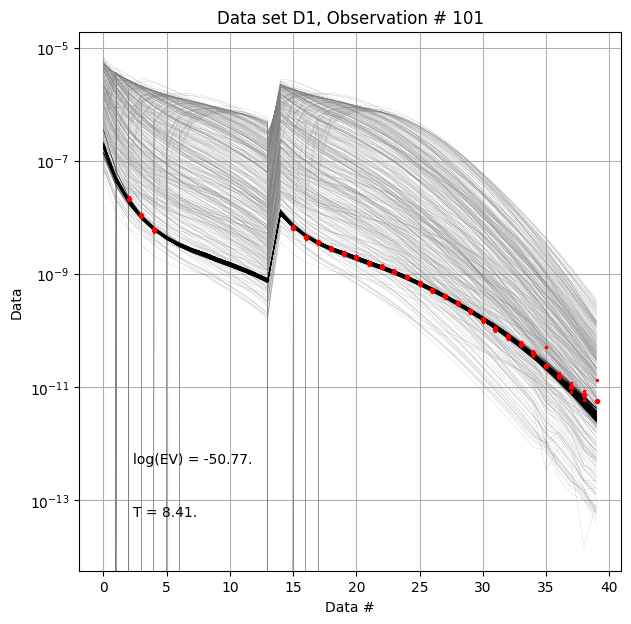

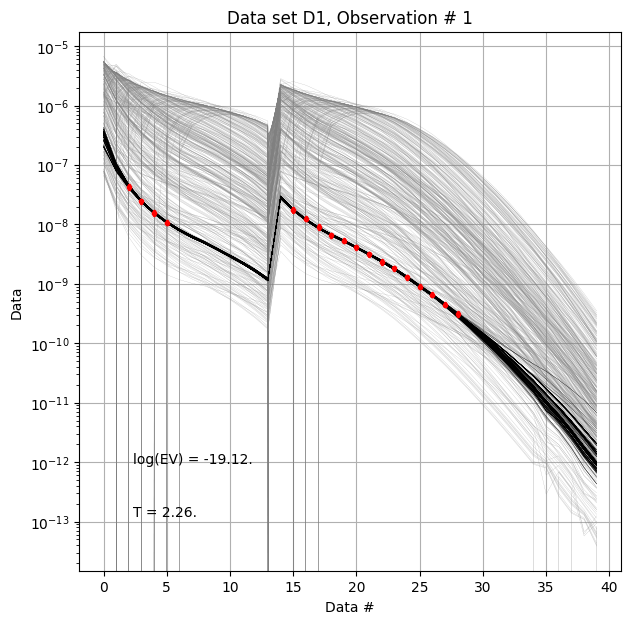

In [8]:
ig.plot_data_prior_post(f_post_h5, i_plot=100)
ig.plot_data_prior_post(f_post_h5, i_plot=0)

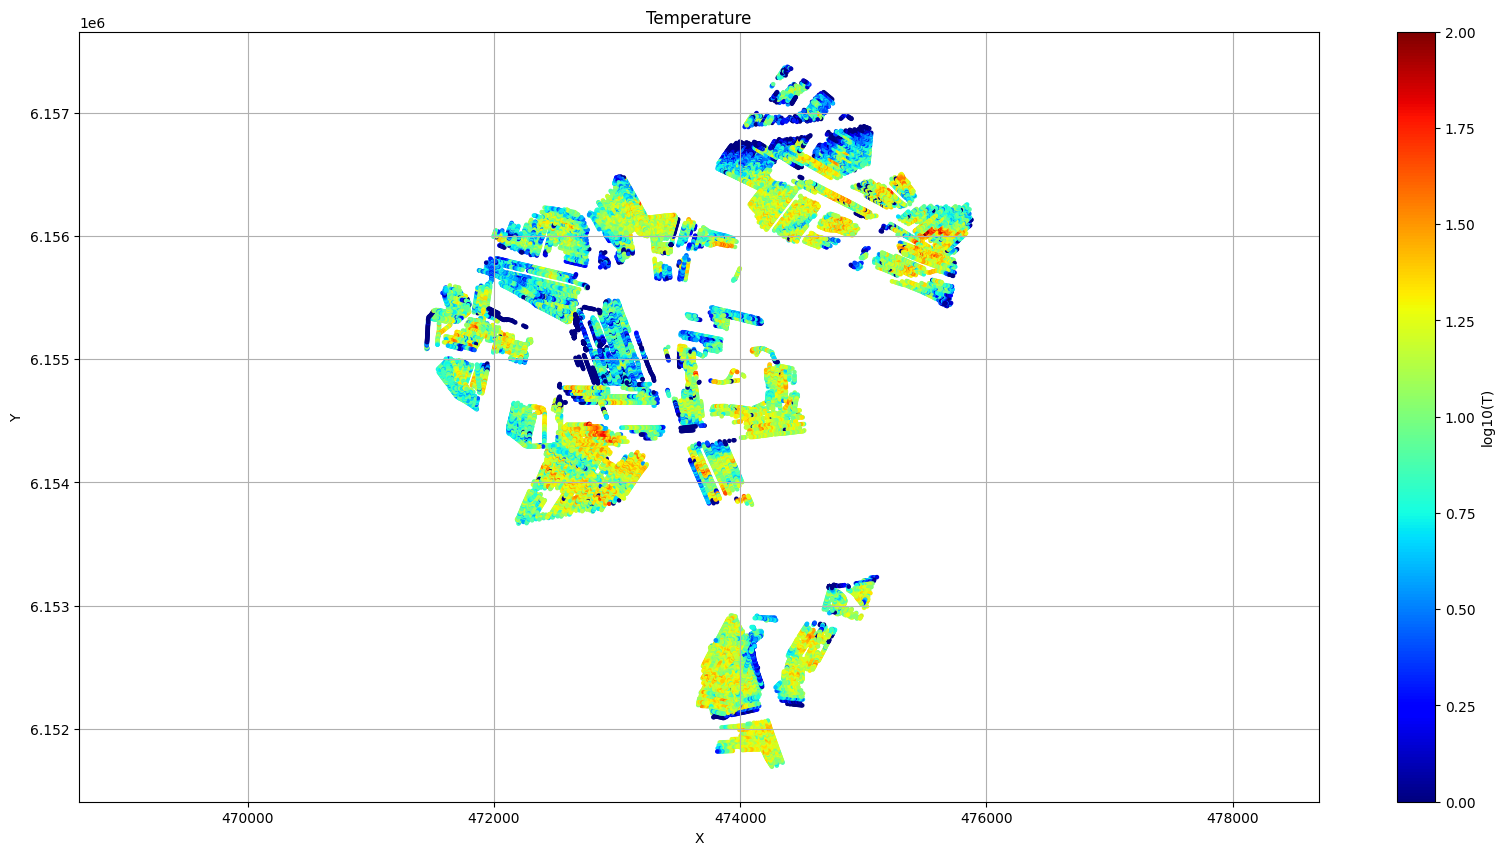

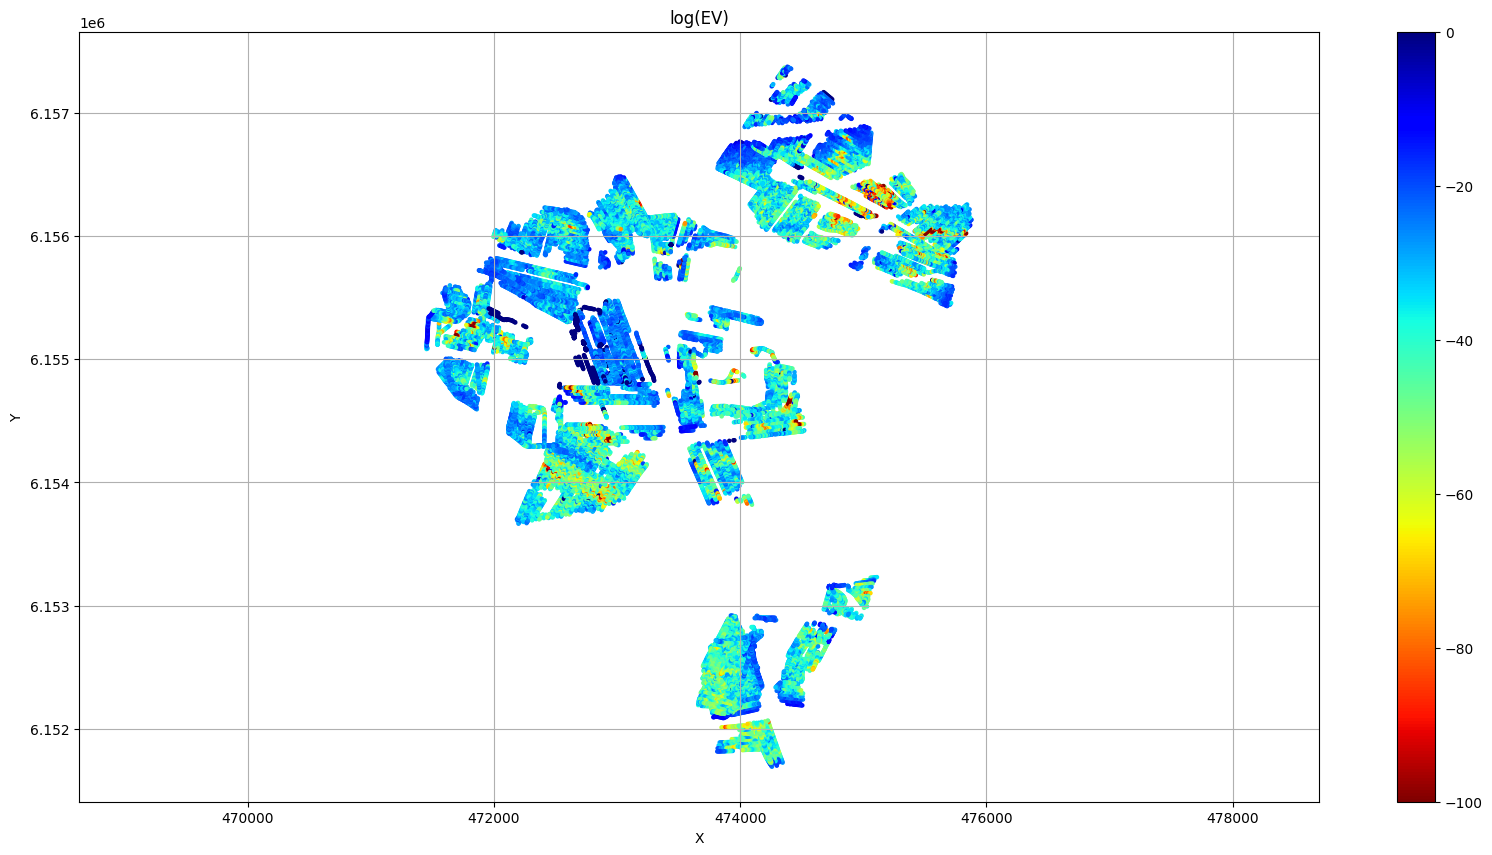

In [9]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T')
# Plot the evidnence (prior likelihood) estimated as part of inversion
ig.plot_T_EV(f_post_h5, pl='EV')

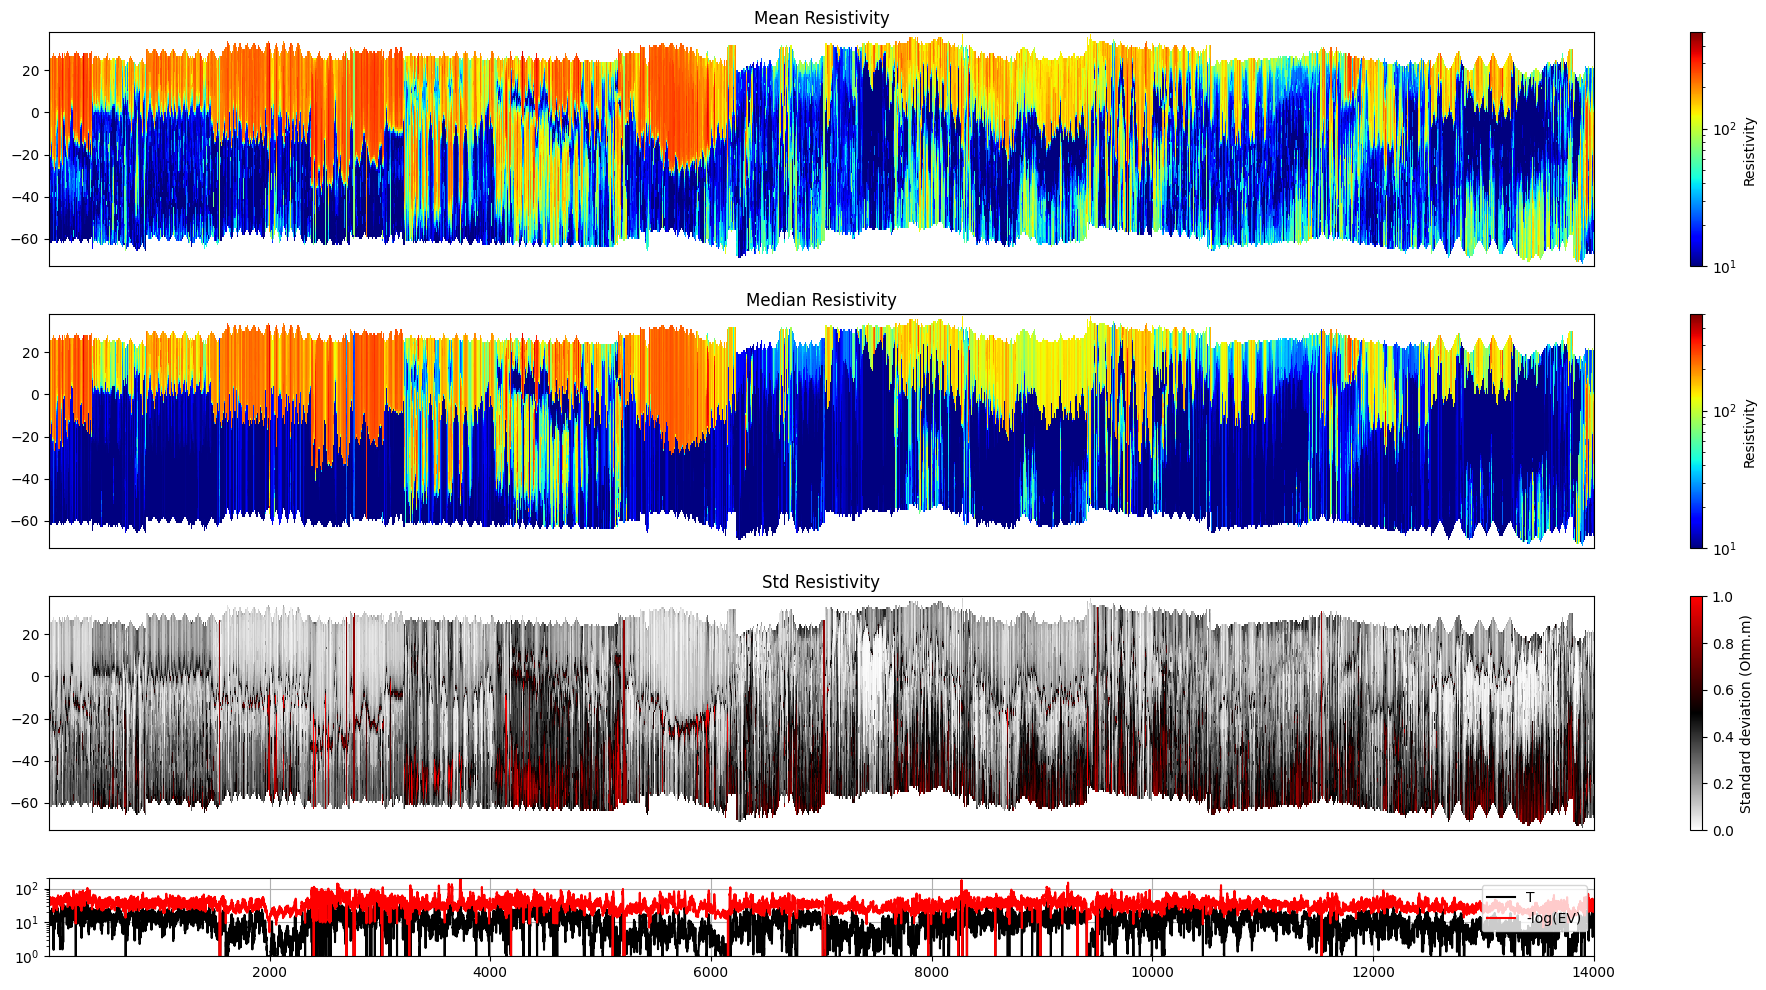

In [14]:
# find index id of data points wher LINE==1000
#i_plot= np.where( np.abs(LINE-1200)<1  )[0]
#ig.plot_profile(f_post_h5, i1=i_plot[0], i2=i_plot[-1], im=1)
ig.plot_profile(f_post_h5, i_plot=10000, i2=14000, im=1)
#ig.plot_profile(f_post_h5, i_plot=0, i2=2000, im=2)

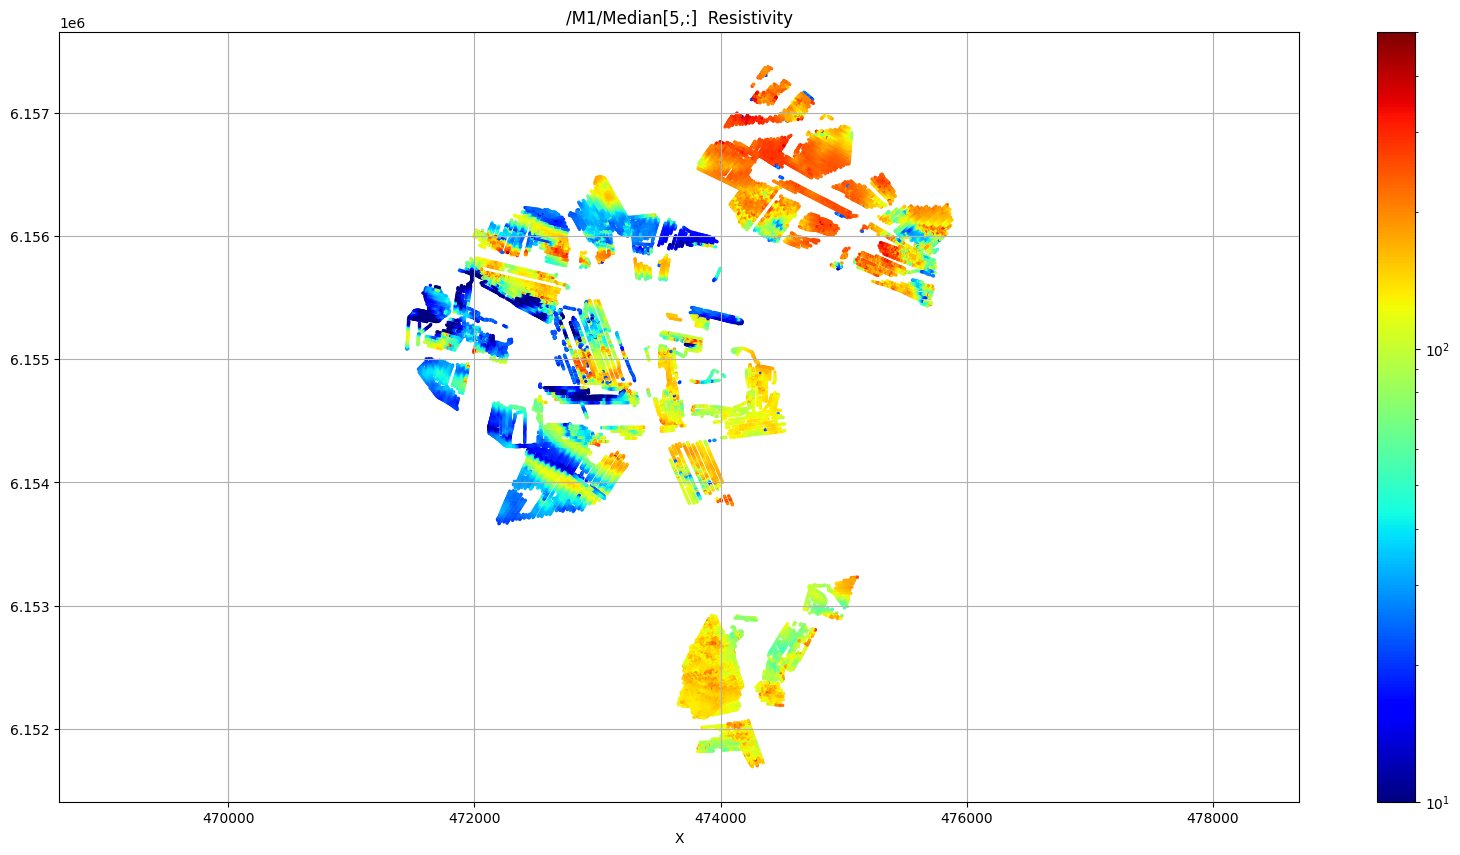

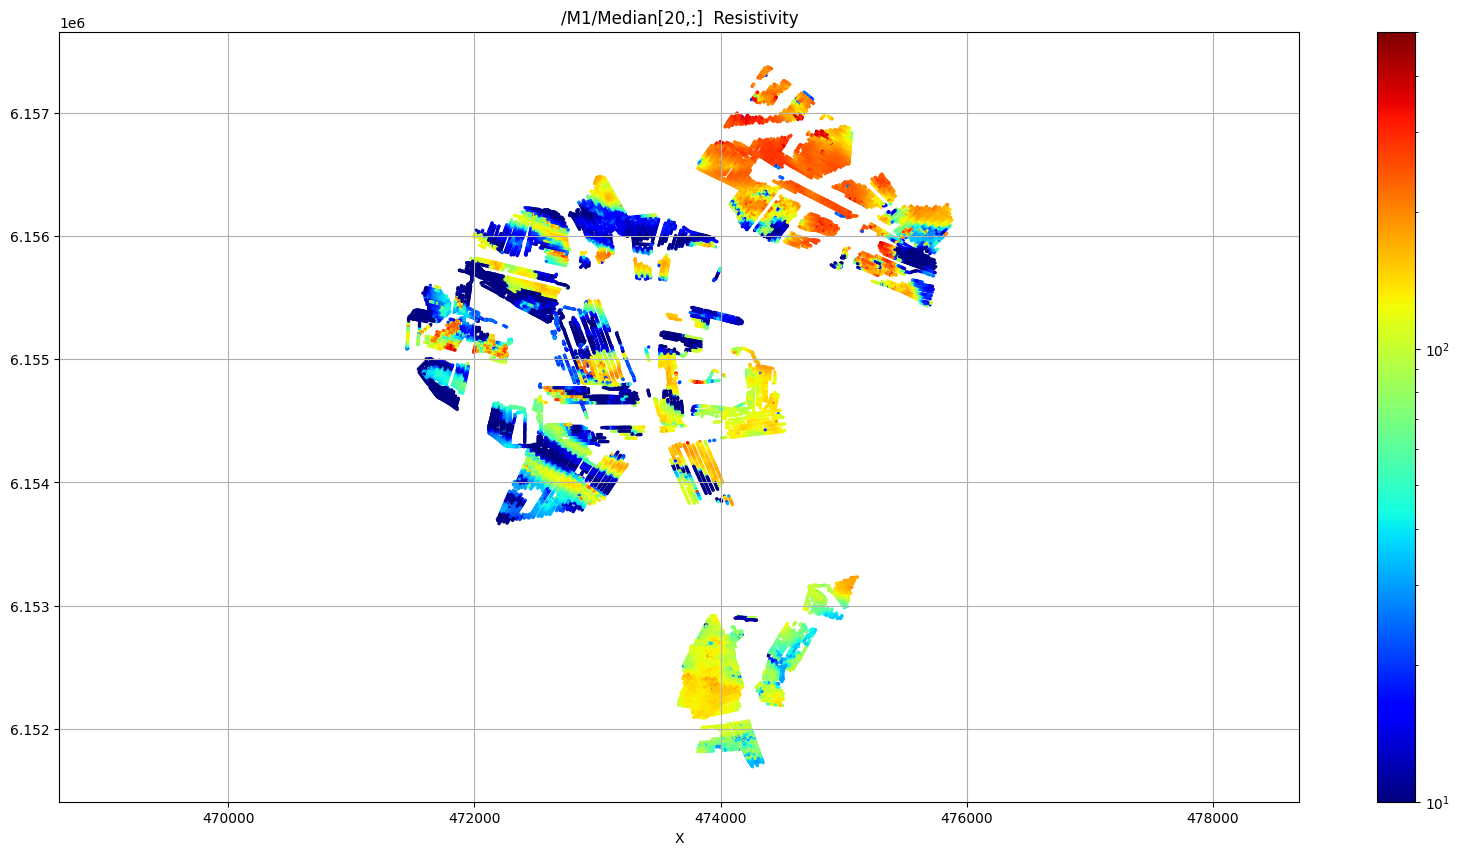

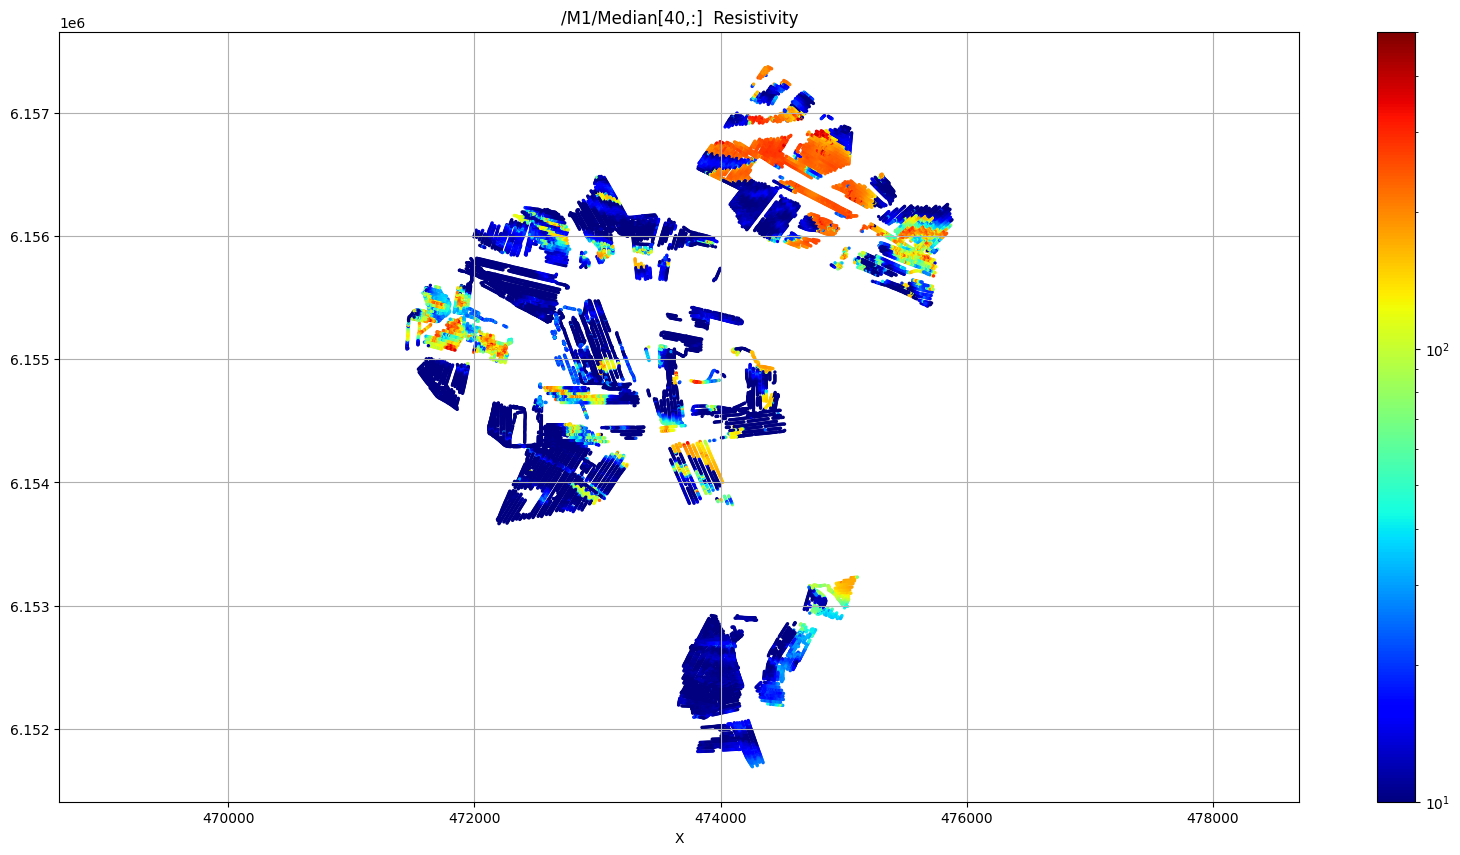

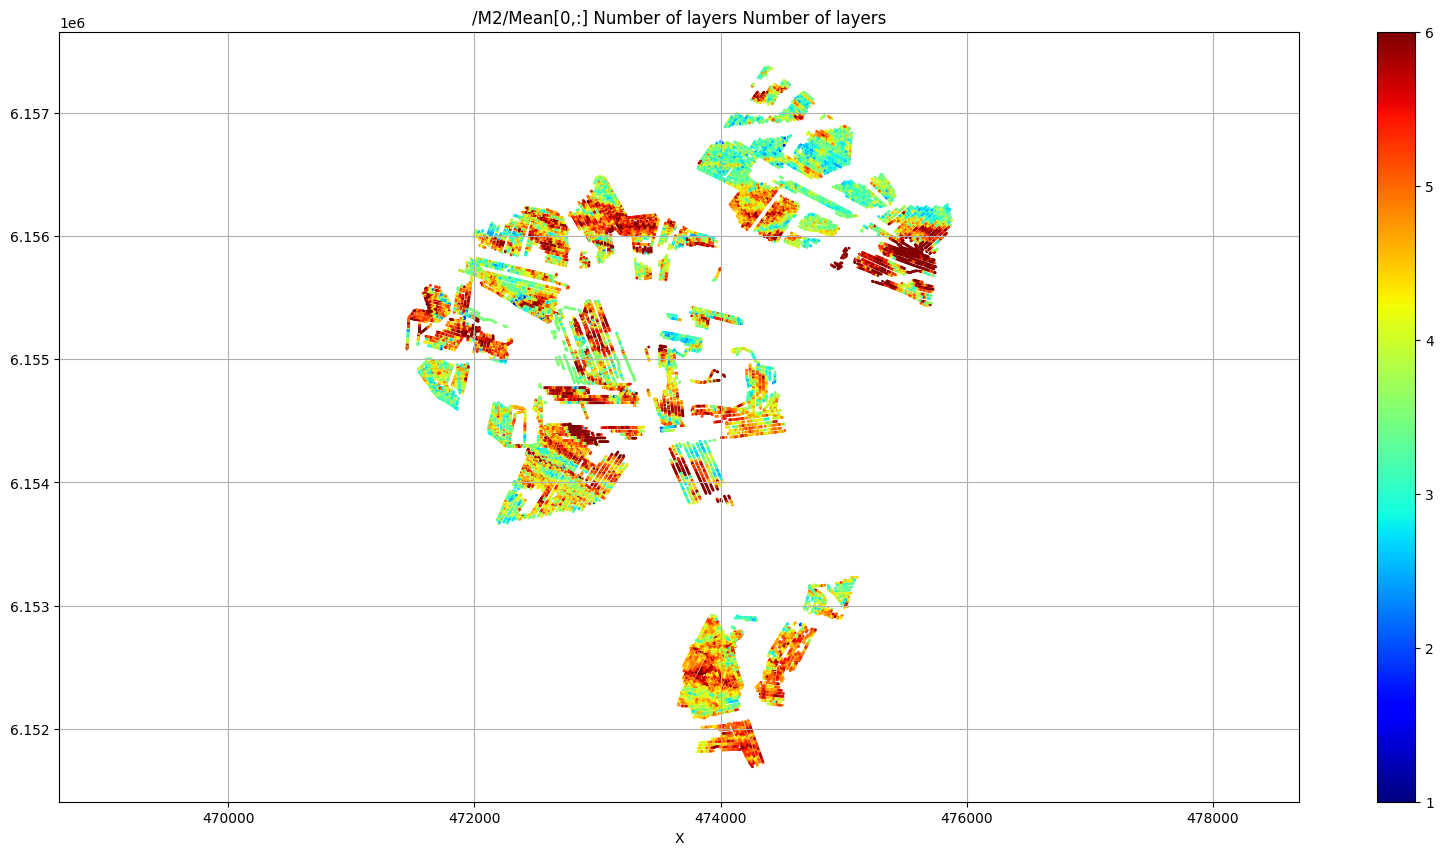

In [11]:

# Plot a 2D feature: Resistivity in layer 10
ig.plot_feature_2d(f_post_h5,im=1,iz=5, key='Median', uselog=1, cmap='jet', s=2)
plt.show()
ig.plot_feature_2d(f_post_h5,im=1,iz=20, key='Median', uselog=1, cmap='jet', s=2)
plt.show()
ig.plot_feature_2d(f_post_h5,im=1,iz=40, key='Median', uselog=1, cmap='jet', s=2)
plt.show()

#ig.plot_feature_2d(f_post_h5,im=1,iz=80,key='Median')

try:
    # Plot a 2D feature: The number of layers
    ig.plot_feature_2d(f_post_h5,im=2,iz=0,key='Mean', title_text = 'Number of layers', uselog=0, clim=[1,6], cmap='jet', s=1)
    plt.show()
except:
    pass

In [12]:
# f_csv, f_point_csv = ig.post_to_csv(f_post_h5)